In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc('legend',**{'fontsize':12})

plt.rc('xtick',**{'labelsize':12})
plt.rc('ytick',**{'labelsize':12})
plt.rc('axes',**{'labelsize':12})


In [24]:
theta_n_trunc = pd.read_csv("../results/theta_n_trunc.csv",header = None)
theta_n_normal = pd.read_csv("../results/theta_n_normal.csv",header = None)
theta_n_hybrid = pd.read_csv("../results/theta_n_hybrid.csv",header = None)
theta_n_exact = pd.read_csv("../results/theta_n_exact.csv",header = None)

theta_samp = pd.concat([theta_n_exact, theta_n_hybrid,theta_n_normal,theta_n_trunc], axis=1)
theta_samp.columns = ['Exact', 'Hybrid','Gaussian', 'Truncated']

/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_39068/1811873275.py:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = p.legend_.legendHandles[::-1]


Text(0, 0.5, 'Posterior density')

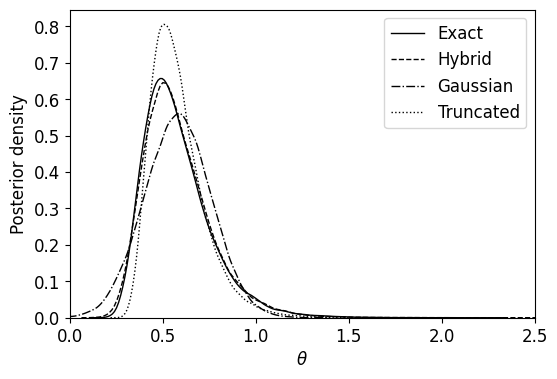

In [51]:
f = plt.figure(figsize = (6,4))
p = sns.kdeplot(theta_samp,fill = False,color = 'k',linewidth = 1.)
lss = [':', '-.', '--', '-']
handles = p.legend_.legendHandles[::-1]

for line, ls, handle in zip(p.lines, lss, handles):
    line.set_linestyle(ls)
    line.set_color('k')
    handle.set_ls(ls)
    handle.set_color('k')
plt.xlim(0,2.5)
plt.xlabel(r'$\theta$')
plt.ylabel('Posterior density')

f = plt.savefig("hybrid.eps",bbox_inches = "tight")

# AIDS

In [2]:
theta_B_MP = pd.read_csv("../results/MP_full_aids.csv",header = None)
theta_B_trunc = pd.read_csv("../results/MP_trunc_aids.csv",header = None)
theta_B_hybrid = pd.read_csv("../results/MP_hybrid_aids.csv",header = None)
theta_B_MCMC = pd.read_csv("../results/MCMC_aids.csv",header = None)

In [3]:
import scipy as sp
#check tails
print(sp.stats.skew(theta_B_MCMC[16]))
print(sp.stats.skew(theta_B_MP[16]))
print(sp.stats.skew(theta_B_hybrid[16]))
print(sp.stats.skew(theta_B_trunc[16]))


0.16114945851349405
0.1190330479743559
0.03155205972963929
0.18163456509464018


In [4]:
#bivariate jointplots
theta_B_MP.insert(17,"Method","Exact") 
theta_B_trunc.insert(17,"Method","Truncated")  
theta_B_hybrid.insert(17,"Method","Hybrid") 

theta_samp = pd.concat([theta_B_MP, theta_B_trunc,theta_B_hybrid], axis=0)

/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/1954146363.py:8: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = theta_B_MCMC, x = j, y = k, color = 'k',
/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/1954146363.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = theta_B_MCMC, x = j, y = k, color = 'k',
/Users/edwinfong/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/1954146363.py:16: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please

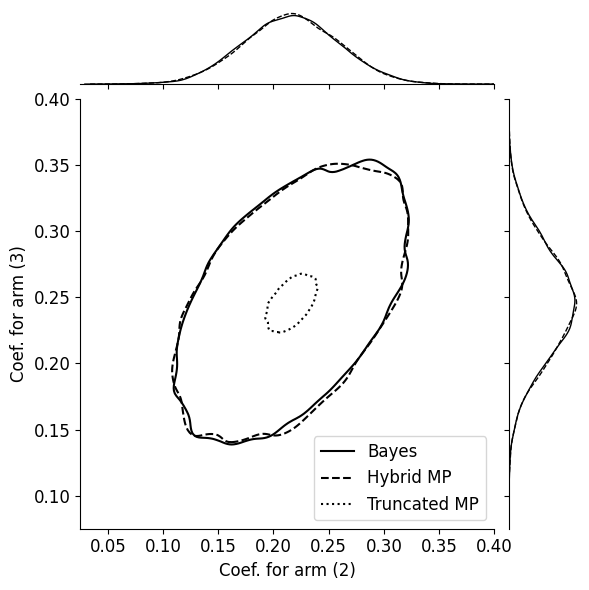

In [5]:
j = 14
k = 15

g = sns.JointGrid(x=14, y=15, data=theta_samp, marginal_ticks = False,xlim=(0.025,0.4),ylim = (0.075,0.4))

g.set_axis_labels("Coef. for arm (2)", "Coef. for arm (3)")

sns.kdeplot(data = theta_B_MCMC, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles="-",linewidth = 1.,
              legend = True, levels = [0.05])

sns.kdeplot(
    data = theta_B_MCMC, x = j, color="k",
    linestyle = "-", ax=g.ax_marg_x,linewidth = 1.
)
sns.kdeplot(
    data = theta_B_MCMC, x = k, color="k",
    linestyle = "-", ax=g.ax_marg_y, vertical=True,linewidth = 1.
)

#Truncated
sns.kdeplot(data = theta_B_trunc, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles=":",linewidth = 1.,
              legend = True,levels = [0.05])


#Hybrid
sns.kdeplot(data = theta_B_hybrid, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles="--",linewidth = 1.,
              legend = True,levels = [0.05])

sns.kdeplot(
    data = theta_B_hybrid, x = j, color="k",
    linestyle = "--", ax=g.ax_marg_x,linewidth = 1.
)
sns.kdeplot(
    data = theta_B_hybrid, x = k, color="k",
    linestyle = "--", ax=g.ax_marg_y, vertical=True,linewidth = 1.
)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='k', lw=1.5, label='Bayes'),
                   Line2D([0], [0], color='k', lw=1.5, label='Hybrid MP',linestyle = '--'),
                    Line2D([0], [0], color='k', lw=1.5, label='Truncated MP',linestyle = ':')]


g.ax_joint.legend(handles= legend_elements,loc = 4)

g.savefig("kdeaids.eps",bbox_inches = "tight")

/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/218406208.py:10: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data = theta_B_MP, x = j, y = k, color = 'k',
/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/218406208.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = theta_B_MP, x = j, y = k, color = 'k',
/Users/edwinfong/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/var/folders/p3/bw17mmns6n57bmzx2xz4r9zw0000gq/T/ipykernel_27840/218406208.py:18: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.13.0; please upda

FileNotFoundError: [Errno 2] No such file or directory: 'plots/approxaids.eps'

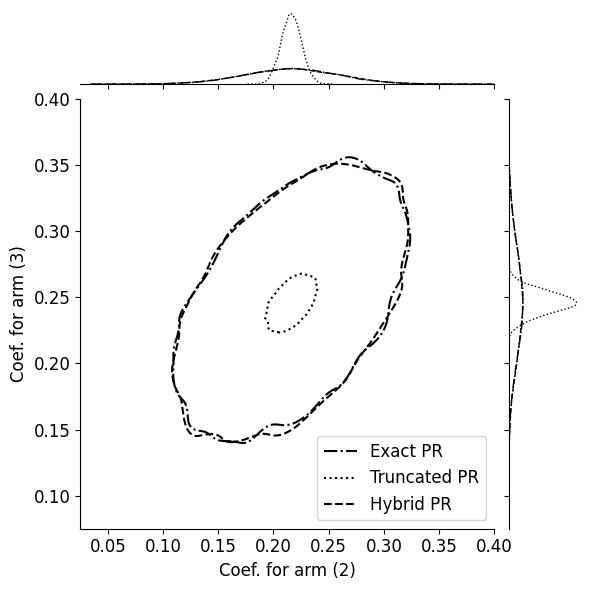

In [6]:
j = 14
k = 15

g = sns.JointGrid(x=14, y=15, data=theta_samp, marginal_ticks = False,xlim=(0.025,0.4),ylim = (0.075,0.4))
#g.ax_marg_x.remove()
#g.ax_marg_y.remove()

g.set_axis_labels("Coef. for arm (2)", "Coef. for arm (3)")

sns.kdeplot(data = theta_B_MP, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles="-.",linewidth = 1.,
              legend = True, levels = [0.05])

sns.kdeplot(
    data = theta_B_MP, x = j, color="k",
    linestyle = "-.", ax=g.ax_marg_x,linewidth = 1.
)
sns.kdeplot(
    data = theta_B_MP, x = k, color="k",
    linestyle = "-.", ax=g.ax_marg_y, vertical=True,linewidth = 1.
)


#Truncated
sns.kdeplot(data = theta_B_trunc, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles=":",linewidth = 1.,
              legend = True,levels = [0.05])

sns.kdeplot(
    data = theta_B_trunc, x = j, color="k",
    linestyle = ":", ax=g.ax_marg_x,linewidth = 1.
)
sns.kdeplot(
    data = theta_B_trunc, x = k, color="k",
    linestyle = ":", ax=g.ax_marg_y, vertical=True,linewidth = 1.
)



#Hybrid
sns.kdeplot(data = theta_B_hybrid, x = j, y = k, color = 'k',
            shade=False, shade_lowest=False, ax=g.ax_joint, linestyles="--",linewidth = 1.,
              legend = True,levels = [0.05])

sns.kdeplot(
    data = theta_B_hybrid, x = j, color="k",
    linestyle = "--", ax=g.ax_marg_x,linewidth = 1.
)
sns.kdeplot(
    data = theta_B_hybrid, x = k, color="k",
    linestyle = "--", ax=g.ax_marg_y, vertical=True,linewidth = 1.
)


from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='k', lw=1.5, label='Exact PR',linestyle = '-.'),
                   Line2D([0], [0], color='k', lw=1.5, label='Truncated PR',linestyle = ':'),
                    Line2D([0], [0], color='k', lw=1.5, label='Hybrid PR',linestyle = '--')]


g.ax_joint.legend(handles= legend_elements,loc = 4)

g.savefig("plots/approxaids.eps",bbox_inches = "tight")